In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the dataset (same one used in Experiment 4)
df = pd.read_csv('business.csv')

In [ ]:
# Displaying summary statistics of the dataset (mean, std, min, max, etc.)
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
               Year
count  50985.000000
mean    2018.000000
std        3.162309
min     2013.000000
25%     2015.000000
50%     2018.000000
75%     2021.000000
max     2023.000000


In [ ]:
# Checking for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Year                           0
Industry_aggregation_NZSIOC    0
Industry_code_NZSIOC           0
Industry_name_NZSIOC           0
Units                          0
Variable_code                  0
Variable_name                  0
Variable_category              0
Value                          0
Industry_code_ANZSIC06         0
dtype: int64


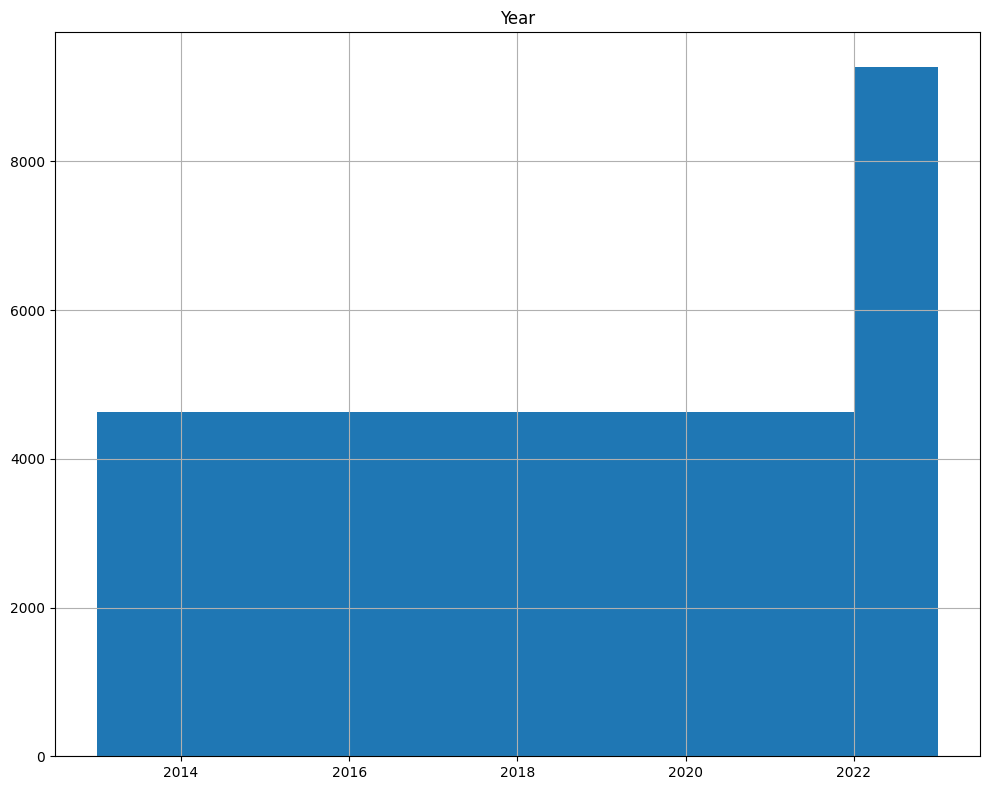

In [ ]:
# Visualizing the distribution of numerical columns using histograms
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

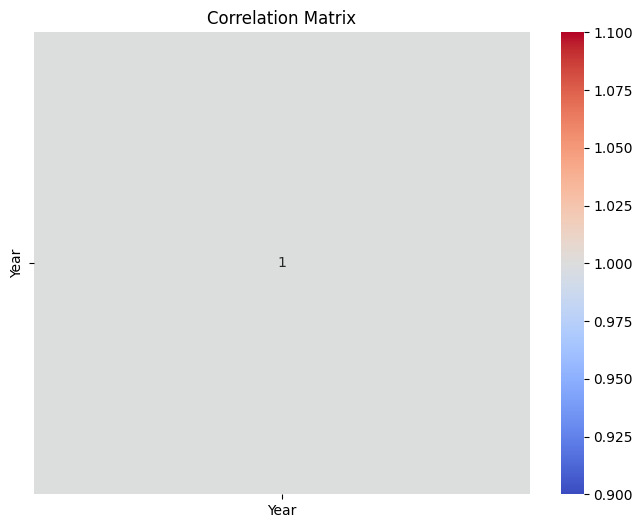

In [ ]:
# Creating a heatmap to visualize the correlation between numerical columns

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include='number')

# Check if there are any numerical columns before plotting
if not numerical_df.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numerical columns available for correlation matrix.")

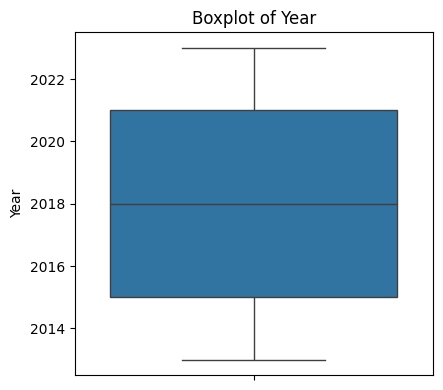

In [42]:


# Identifying numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Determine the number of subplots needed based on the number of numerical columns
n_cols = len(numerical_cols)
n_rows = (n_cols // 3) + 1  # Adjusting rows based on how many columns we have

# Create a figure with dynamic subplot arrangement
plt.figure(figsize=(12, n_rows * 4))

# Looping through each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, 3, i)  # Adjusting the subplot grid dynamically

    # Dropping missing and non-finite values (NaN, inf, -inf) from the column
    clean_col = df[col].dropna()  # Remove NaN values
    clean_col = clean_col[clean_col.apply(lambda x: x != float('inf') and x != float('-inf'))]  # Remove inf values

    # Plotting the cleaned data
    if not clean_col.empty:  # Ensure there is data to plot
        sns.boxplot(clean_col)
        plt.title(f'Boxplot of {col}')
    else:
        plt.title(f'{col} (No valid data)')

plt.tight_layout()
plt.show()